In [ ]:
import pandas as pd
import datetime as dt
from pathlib import Path

In [ ]:
PROJPATH = Path().resolve().parent
outpath = PROJPATH / "data/breakupdata/derived"


In [ ]:
breakuppth = PROJPATH / "data/breakupdata/NWS-APRFC_AK_BreakupDate.csv"
breakup = pd.read_csv(breakuppth, escapechar='\\')
breakup = breakup[breakup.breakup > '1980-01-01']
breakup

,id,siteID,year,icemoved,timemoved,breakup,Impact Based Flood Severity,firstboat,unsafeman,unsafeveh,typeveh,lastice,remarks,Initial Forecast Start Date,Initial Forecast End Date,qualityFlag,internalNotes
0,7184,Tanana River at Salcha,2023,2023-04-30,NaN,2023-04-30,unknown,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-30,2023-04-30,NaN,Fresh eyes on ice facebook videornhttps://www....
1,7185,Chena River at Fairbanks,2023,NaN,NaN,2023-04-30,none,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-25,2023-05-01,NaN,Based on a free flowing channel that formed in...
2,7186,Kuskokwim River at Nikolai,2023,NaN,NaN,2023-05-02,none,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-04,2023-05-04,NaN,Confirmed on KYUK RiverWatch Radio Show
3,7187,Skwentna River at Skwentna,2023,NaN,NaN,2023-05-07,none,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09,2023-05-09,NaN,observer was out of town estimates 5/7 for bre...
4,7188,Gakona River at Gakona,2023,NaN,NaN,2023-05-05,none,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09,2023-05-09,NaN,Observer report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,5998,Yukon River at Ruby,1980,1980-05-07,02:00pm,1980-05-07,NaN,1980-05-15,1980-05-03,1980-05-03,Snowmachine,1980-05-15,r,NaN,NaN,NaN,NaN
2779,6165,Yukon River at Tanana,1980,1980-05-03,09:00pm,1980-05-03,NaN,1980-05-15,1980-04-30,1980-04-26,Snowmobile,1980-05-15,5-3-80 9mp ice breakup Tanana River to Tozitna...,NaN,NaN,NaN,NaN
2780,6276,Yukon River at Dawson,1980,NaN,NaN,1980-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2781,6521,Yukon River at Galena,1980,NaN,NaN,1980-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tabulated = breakup.siteID.value_counts()

In [ ]:
breakup_clean = breakup.groupby('siteID').filter(lambda x: len(x) >= 30)[['id', 'siteID', 'year', 'breakup']].reset_index(drop=True)
breakup_clean

,id,siteID,year,breakup
0,7185,Chena River at Fairbanks,2023,2023-04-30
1,7186,Kuskokwim River at Nikolai,2023,2023-05-02
2,7188,Gakona River at Gakona,2023,2023-05-05
3,7189,Gulkana River nr Gakona,2023,2023-05-02
4,7190,Tanana River at Nenana,2023,2023-05-08
...,...,...,...,...
1529,5998,Yukon River at Ruby,1980,1980-05-07
1530,6165,Yukon River at Tanana,1980,1980-05-03
1531,6276,Yukon River at Dawson,1980,1980-05-06
1532,6521,Yukon River at Galena,1980,1980-05-10


In [ ]:
breakup_clean.siteID.value_counts()

Kuskokwim River at McGrath            44
Yukon River at Dawson                 44
Kuskokwim River at Bethel             44
Yukon River at Eagle                  44
Tanana River at Nenana                44
Yukon River at Galena                 43
Koyukuk River at Bettles              42
Kuskokwim River at Aniak              41
Yukon River at Circle                 40
Kobuk River at Kobuk                  40
Yukon River at Fort Yukon             40
Yukon River at Tanana                 39
Yukon River at Ruby                   38
Kuskokwim River at Nikolai            38
Yukon River nr Emmonak                38
Kobuk River at Ambler                 38
Kuskokwim River at Crooked Creek      38
Kuskokwim River at Red Devil          38
Kuskokwim River at Akiak              38
Yukon River at Kaltag                 38
Koyukuk River at Allakaket            38
Yukon River at Mountain Village       37
Yukon River at Holy Cross             37
Yukon River at Russian Mission        37
Koyukuk River at

In [ ]:
breakup_clean['JulianDay'] = pd.to_datetime(breakup_clean.breakup).dt.strftime('%j').astype('int')
breakup_clean['year'] = breakup_clean.year.astype('int')
breakup_clean

,id,siteID,year,breakup,JulianDay
0,7185,Chena River at Fairbanks,2023,2023-04-30,120
1,7186,Kuskokwim River at Nikolai,2023,2023-05-02,122
2,7188,Gakona River at Gakona,2023,2023-05-05,125
3,7189,Gulkana River nr Gakona,2023,2023-05-02,122
4,7190,Tanana River at Nenana,2023,2023-05-08,128
...,...,...,...,...,...
1529,5998,Yukon River at Ruby,1980,1980-05-07,128
1530,6165,Yukon River at Tanana,1980,1980-05-03,124
1531,6276,Yukon River at Dawson,1980,1980-05-06,127
1532,6521,Yukon River at Galena,1980,1980-05-10,131


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

<AxesSubplot: xlabel='year'>

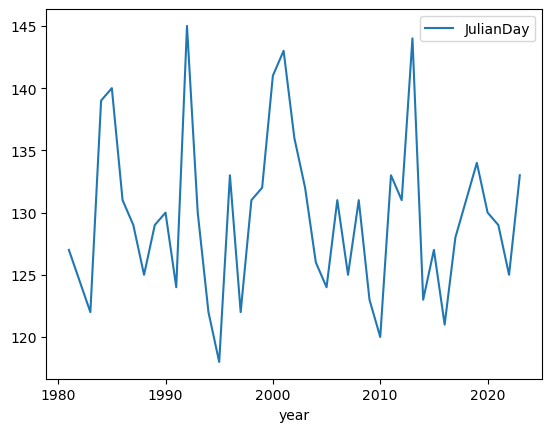

In [ ]:
breakup_clean[breakup_clean.siteID=="Koyukuk River at Bettles"].sort_values('year').plot(x="year", y="JulianDay")

Load dataset again - for trend analysis, keep all years. 

In [ ]:
breakup_all = pd.read_csv(breakuppth, escapechar='\\')
breakup_all_clean = breakup_all[breakup_all.breakup > '1940-01-01']
breakup_all_clean = breakup_all_clean[breakup_all_clean.siteID.isin(breakup_clean.siteID)]
# breakup_all_clean = breakup_all_clean.groupby('siteID').filter(lambda x: len(x) >= 50)[['id', 'siteID', 'year', 'breakup']].reset_index(drop=True)
breakup_all_clean['JulianDay'] = pd.to_datetime(breakup_all_clean.breakup).dt.strftime('%j').astype('int')
breakup_all_clean['year'] = breakup_all_clean.year.astype('int')

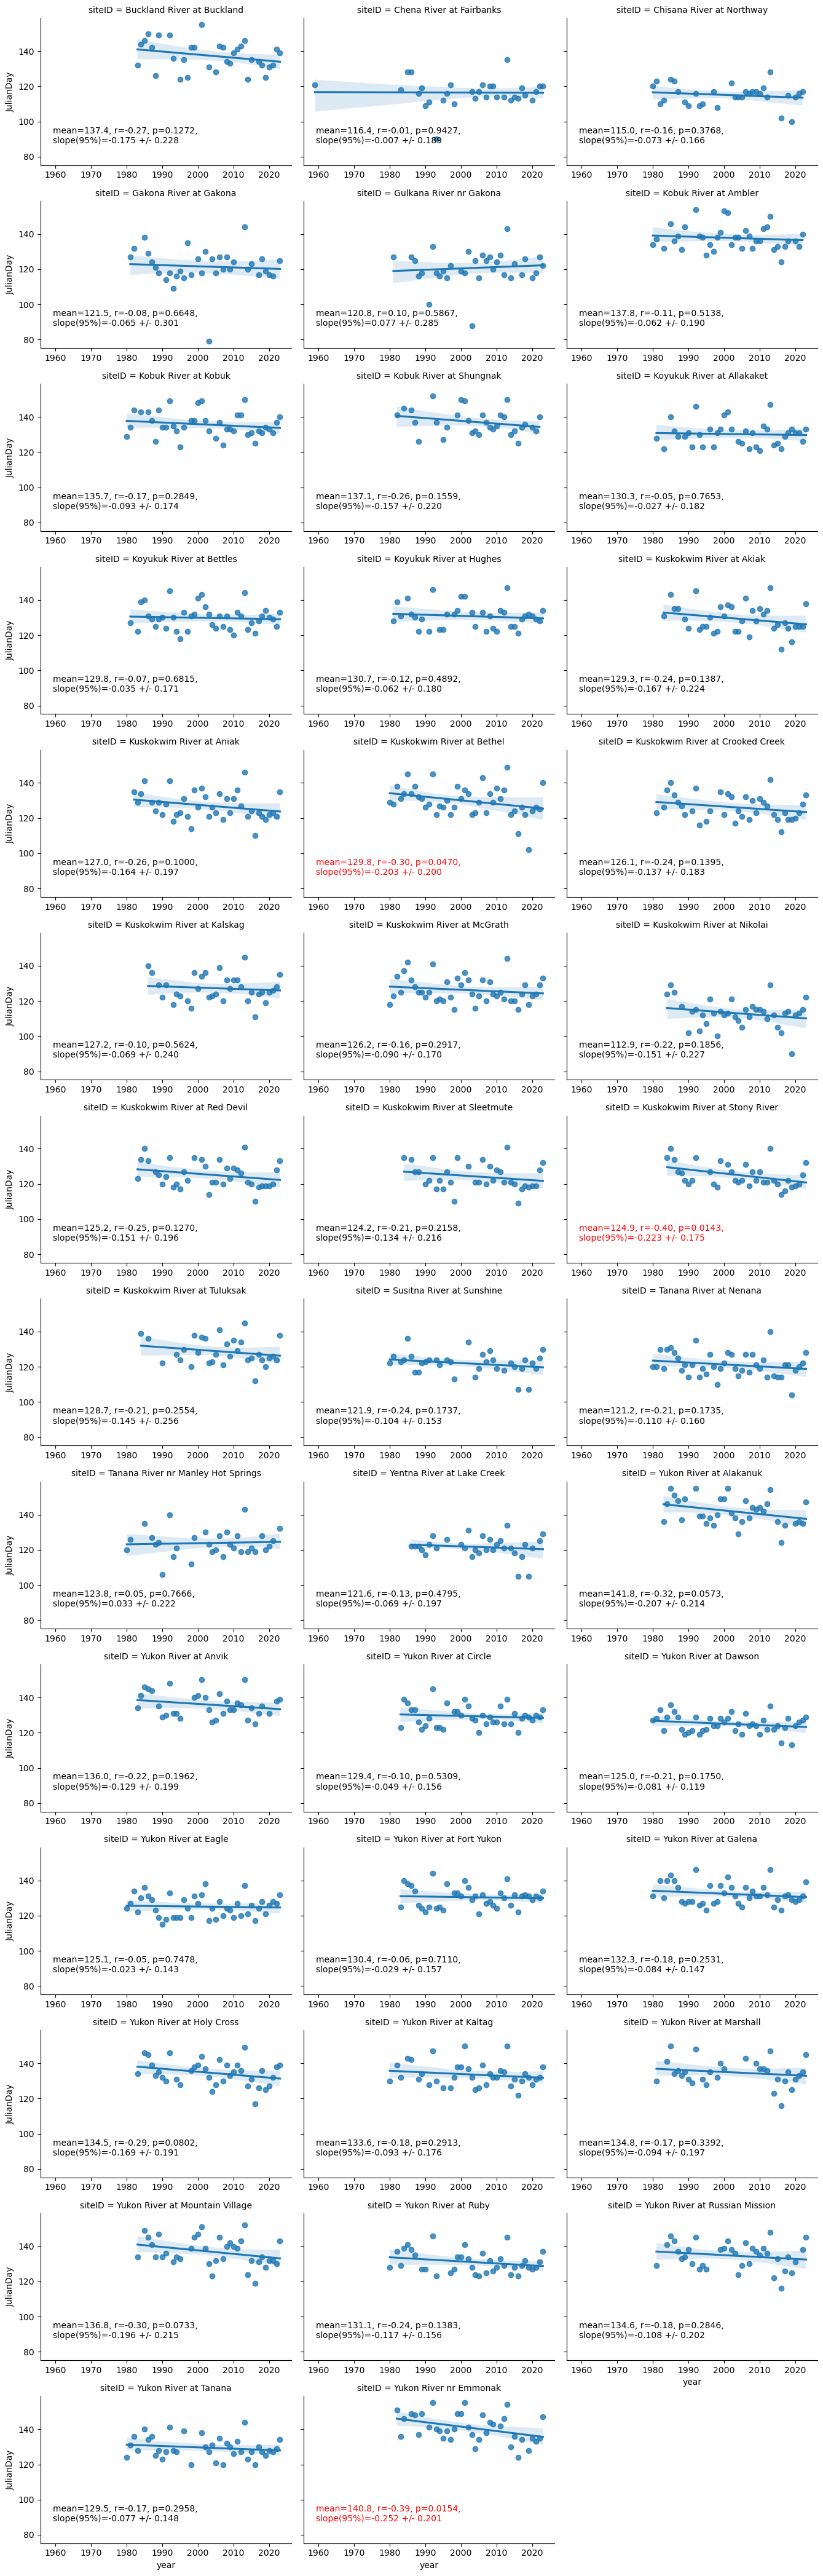

In [ ]:
g = sns.lmplot(data=breakup_clean.sort_values(by=['siteID', 'year']), x="year", y="JulianDay",
               col='siteID', col_wrap=3, height=3, aspect=1.5)

def annotate(data, **kws):
    result = scipy.stats.linregress(data['year'], data['JulianDay'])
    avg = data['JulianDay'].mean()
    # t-test for 95 % confidence interval:
    tinv = lambda p, df: abs(scipy.stats.t.ppf(p/2, df))
    ts = tinv(0.05, len(data['year'])-2)
    ax = plt.gca()
    if result.pvalue < 0.05:
        if result.rvalue < 0:
            color="red"
        if result.rvalue > 0:
            color="green"
    else:
        color="black"
    ax.text(.05, .15, f'mean={avg:.1f}, r={result.rvalue:.2f}, p={result.pvalue:.4f},\nslope(95%)={result.slope:.3f} +/- {ts*result.stderr:.3f}',
            transform=ax.transAxes, color=color)

g.map_dataframe(annotate)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

Text(0.27, 0.965, '(Selected locations have at least 30 years of data since 1980)')

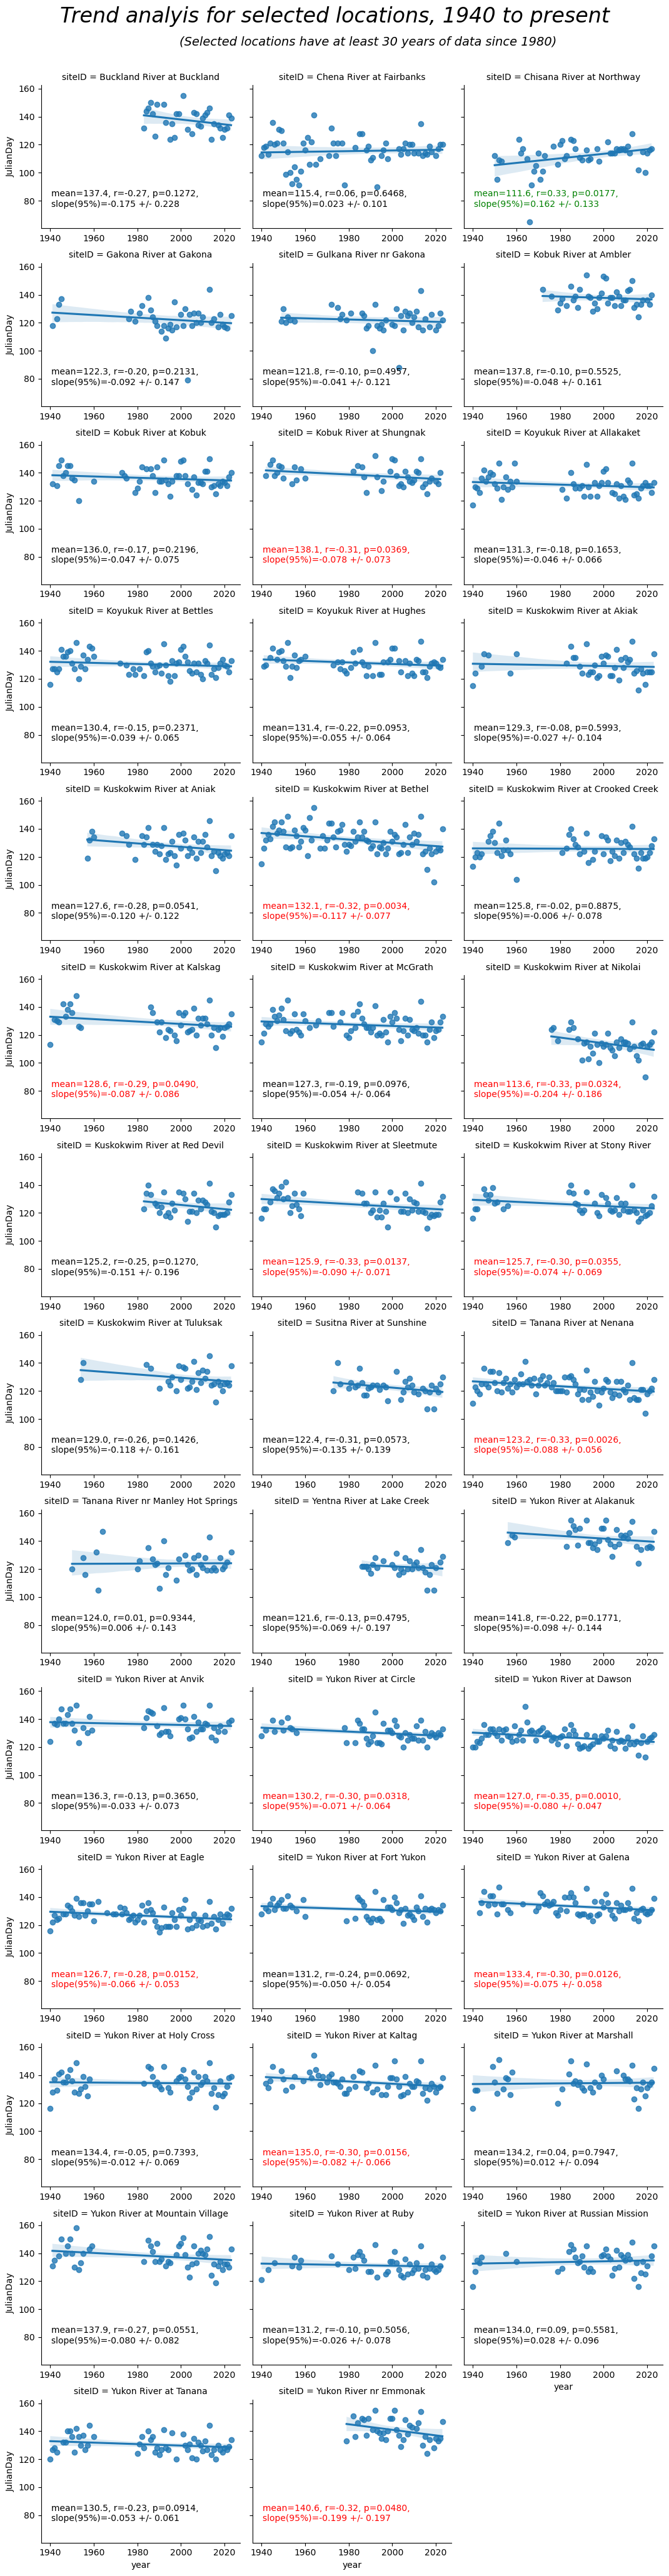

In [ ]:
g = sns.lmplot(data=breakup_all_clean.sort_values(['siteID', 'year']), x="year", y="JulianDay",
               col='siteID', col_wrap=3, height=3, aspect=1.2,)

def annotate(data, **kws):
    result = scipy.stats.linregress(data['year'], data['JulianDay'])
    avg = data['JulianDay'].mean()
    # t-test for 95 % confidence interval:
    tinv = lambda p, df: abs(scipy.stats.t.ppf(p/2, df))
    ts = tinv(0.05, len(data['year'])-2)
    ax = plt.gca()
    if result.pvalue < 0.05:
        if result.rvalue < 0:
            color="red"
        if result.rvalue > 0:
            color="green"
    else:
        color="black"
    ax.text(.05, .15, f'mean={avg:.1f}, r={result.rvalue:.2f}, p={result.pvalue:.4f},\nslope(95%)={result.slope:.3f} +/- {ts*result.stderr:.3f}',
            transform=ax.transAxes, color=color)

g.map_dataframe(annotate)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Trend analyis for selected locations, 1940 to present', fontsize=24, style="italic")
g.fig.text(x=0.27, y=0.965, s='(Selected locations have at least 30 years of data since 1980)', fontsize=14, style="italic")


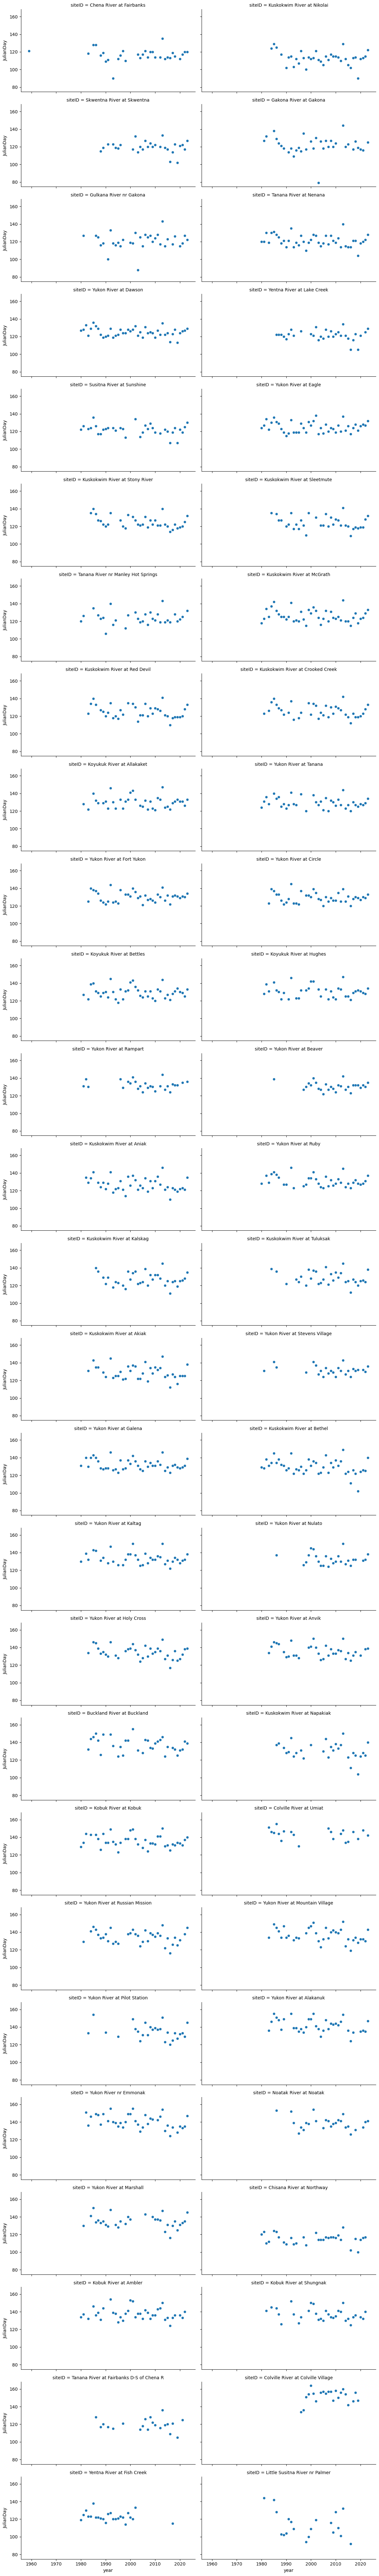

In [ ]:

g = sns.FacetGrid(breakup_clean, col='siteID', col_wrap=2, height=3, aspect=2)
g.map(sns.scatterplot, "year", "JulianDay")


In [ ]:
with open(outpath / "breakupDate_cleaned.csv", "w") as dst:
    dst.write("# Data from NWS-APRFC_AK_BreakupDate.csv\n")
    dst.write("# Only sites with more than 30 data points since 1980\n")
    dst.write("# \n")
    breakup_clean.to_csv(dst)    

### Averages of selected

In [ ]:
breakupDS = pd.read_csv(outpath / "breakupDate_cleaned.csv", skiprows=3, index_col=0)
breakupDS

,id,siteID,year,breakup,JulianDay
0,7185,Chena River at Fairbanks,2023,2023-04-30,120
1,7186,Kuskokwim River at Nikolai,2023,2023-05-02,122
2,7188,Gakona River at Gakona,2023,2023-05-05,125
3,7189,Gulkana River nr Gakona,2023,2023-05-02,122
4,7190,Tanana River at Nenana,2023,2023-05-08,128
...,...,...,...,...,...
1529,5998,Yukon River at Ruby,1980,1980-05-07,128
1530,6165,Yukon River at Tanana,1980,1980-05-03,124
1531,6276,Yukon River at Dawson,1980,1980-05-06,127
1532,6521,Yukon River at Galena,1980,1980-05-10,131


In [ ]:
breakupDS = breakupDS[
    breakupDS.siteID.str.startswith(('Tanana', 'Kuskokwim', 'Yukon', 'Kobuk', 'Buckland'))].sort_values(by=['siteID', 'year'])

In [ ]:
with open(outpath / "breakupDate_cleaned_selected.csv", "w") as dst:
    dst.write("# Data from NWS-APRFC_AK_BreakupDate.csv\n")
    dst.write("# Only sites with more than 30 data points since 1980 on selected Rivers\n")
    dst.write("# \n")
    breakupDS.to_csv(dst)   

In [ ]:
breakupDS['siteID'].value_counts().reset_index().sort_values(['index'])

,index,siteID
27,Buckland River at Buckland,34
13,Kobuk River at Ambler,38
7,Kobuk River at Kobuk,40
30,Kobuk River at Shungnak,32
18,Kuskokwim River at Akiak,38
6,Kuskokwim River at Aniak,41
1,Kuskokwim River at Bethel,44
17,Kuskokwim River at Crooked Creek,38
26,Kuskokwim River at Kalskag,35
2,Kuskokwim River at McGrath,44


In [ ]:
len(breakupDS['siteID'].unique())

32

In [ ]:
breakupDS['breakupdate'] = pd.to_datetime(breakupDS.breakup).dt.date
breakupDS['march1'] = breakupDS.apply(lambda row: dt.date(row.year, 3, 3), axis=1)
breakupDS['days_since_march1'] = (breakupDS['breakupdate'] - breakupDS['march1']).dt.days
breakupDS 

,id,siteID,year,breakup,JulianDay,breakupdate,march1,days_since_march1
1456,209,Buckland River at Buckland,1983,1983-05-12,132,1983-05-12,1983-03-03,70
1430,210,Buckland River at Buckland,1984,1984-05-23,144,1984-05-23,1984-03-03,81
1398,1067,Buckland River at Buckland,1985,1985-05-26,146,1985-05-26,1985-03-03,84
1358,211,Buckland River at Buckland,1986,1986-05-30,150,1986-05-30,1986-03-03,88
1322,212,Buckland River at Buckland,1987,1987-05-22,142,1987-05-22,1987-03-03,80
...,...,...,...,...,...,...,...,...
182,6952,Yukon River nr Emmonak,2019,2019-05-08,128,2019-05-08,2019-03-03,66
151,7029,Yukon River nr Emmonak,2020,2020-05-14,135,2020-05-14,2020-03-03,72
106,7081,Yukon River nr Emmonak,2021,2021-05-13,133,2021-05-13,2021-03-03,71
64,7160,Yukon River nr Emmonak,2022,2022-05-15,135,2022-05-15,2022-03-03,73


In [ ]:
breakupDS.iloc[191]['year'] = 2017

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13756/1071833152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breakupDS.iloc[191]['year'] = 2017


In [ ]:
breakupDS[breakupDS.siteID=='Chena River at Fairbanks']

,id,siteID,year,breakup,JulianDay,breakupdate,march1,days_since_march1


In [ ]:
breakup_agg = breakupDS.groupby(['siteID'])['days_since_march1'].agg(['mean', 'std'])
breakup_agg = breakup_agg.reset_index()
#breakup_agg['breakup_avgday'] = breakup_agg.apply(lambda row: dt.date(2022, 3, 1) + dt.timedelta(days=row['mean'], axis=1))
breakup_agg

,siteID,mean,std
0,Buckland River at Buckland,75.147059,8.206178
1,Kobuk River at Ambler,75.526316,6.828940
2,Kobuk River at Kobuk,73.450000,6.894628
3,Kobuk River at Shungnak,74.812500,7.045646
4,Kuskokwim River at Akiak,67.052632,7.918324
5,Kuskokwim River at Aniak,55.878049,56.197952
6,Kuskokwim River at Bethel,67.500000,8.662939
7,Kuskokwim River at Crooked Creek,63.815789,7.085788
8,Kuskokwim River at Kalskag,65.028571,7.489152
9,Kuskokwim River at McGrath,63.977273,7.112023


In [ ]:
breakup_agg['mean']

0     75.147059
1     75.526316
2     73.450000
3     74.812500
4     67.052632
5     55.878049
6     67.500000
7     63.815789
8     65.028571
9     63.977273
10    50.657895
11    62.947368
12    61.914286
13    62.694444
14    66.437500
15    58.931818
16    61.593750
17    79.527778
18    73.742857
19    67.125000
20    62.750000
21    62.863636
22    68.200000
23    70.023256
24    72.324324
25    71.368421
26    72.562500
27    74.648649
28    68.815789
29    72.405405
30    67.282051
31    78.526316
Name: mean, dtype: float64

In [ ]:
breakup_agg

,siteID,mean,std
0,Buckland River at Buckland,75.147059,8.206178
1,Kobuk River at Ambler,75.526316,6.828940
2,Kobuk River at Kobuk,73.450000,6.894628
3,Kobuk River at Shungnak,74.812500,7.045646
4,Kuskokwim River at Akiak,67.052632,7.918324
5,Kuskokwim River at Aniak,55.878049,56.197952
6,Kuskokwim River at Bethel,67.500000,8.662939
7,Kuskokwim River at Crooked Creek,63.815789,7.085788
8,Kuskokwim River at Kalskag,65.028571,7.489152
9,Kuskokwim River at McGrath,63.977273,7.112023


In [ ]:
breakupDS[breakupDS.siteID=='Tanana River at Nenana'].sort_values(by=['year']).to_csv(outpath / 'Nenana_working.csv')

In [ ]:
with open(outpath / "breakupDate_mean_std.csv", "w") as dst:
    dst.write("# Data from NWS-APRFC_AK_BreakupDate.csv \n")
    dst.write("# Means and std of breakup day in days since March 1 \n")
    dst.write("# Only sites with more than 20 data points since 1980 on selected Rivers\n")
    dst.write("# \n")
    breakup_agg.to_csv(dst)   